## EDA

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Training data

In [3]:
# Loading the train data
df = pd.read_csv('D:\\Train.csv')

# Looking top 10 rows
df.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [6]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [7]:
# Looking random 10 rows of the data
df.sample(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
7680,466583,Female,Yes,38,Yes,Doctor,0.0,Average,2.0,Cat_6,A
3472,466951,Female,Yes,52,Yes,Artist,0.0,High,3.0,Cat_6,C
4897,463584,Female,No,22,No,Engineer,NaN,Low,3.0,Cat_6,D
4361,462787,Female,No,29,No,Artist,1.0,Low,1.0,Cat_3,A
3517,459868,Female,Yes,46,Yes,Engineer,1.0,Average,2.0,Cat_6,C
1993,461372,Male,No,27,Yes,Artist,3.0,Low,1.0,Cat_2,A
1207,464704,Male,Yes,42,Yes,Healthcare,0.0,Average,4.0,Cat_4,B
3410,467908,Female,Yes,42,Yes,Engineer,0.0,High,4.0,Cat_6,B
1941,461383,Male,Yes,71,Yes,Artist,0.0,High,2.0,Cat_6,B
6888,462218,Male,Yes,53,No,Executive,0.0,Average,5.0,Cat_4,B


###### Check data in Var_1

In [8]:
#check for individual numbers of each Vars
df.Var_1.value_counts()

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

In [9]:
# Filling missing values
df.loc[ (pd.isnull(df['Var_1'])) & (df['Graduated'] == 'Yes'),"Var_1"] = 'Cat_6'
df.loc[ (pd.isnull(df['Var_1'])) & (df['Graduated'] == 'No'),"Var_1"] = 'Cat_4'
df.loc[ (pd.isnull(df["Var_1"])) & ((df['Profession'] == 'Lawyer') | (df['Profession'] == 'Artist')),"Var_1"] = 'Cat_6'
df.loc[ (pd.isnull(df["Var_1"])) & (df['Age'] > 40),"Var_1"] = 'Cat_6'

In [10]:
df.loc[ (pd.isnull(df["Ever_Married"])) & ((df['Spending_Score'] == 'Average') | (df['Spending_Score'] == 'High')),"Ever_Married"] = 'Yes'
df.loc[ (pd.isnull(df["Ever_Married"])) & (df['Spending_Score'] == 'Low'),"Ever_Married"] = 'No'
df.loc[ (pd.isnull(df["Ever_Married"])) & (df['Age'] > 40),"Ever_Married"] = 'Yes'
df.loc[ (pd.isnull(df["Ever_Married"])) & (df['Profession'] == 'Healthcare'),"Ever_Married"] = 'No'

In [11]:
# Filling the missing values w.r.t other attributes underlying pattern
df.loc[ (pd.isnull(df["Graduated"])) & (df['Spending_Score'] == 'Average'),"Graduated"] = 'Yes'
df.loc[ (pd.isnull(df["Graduated"])) & (df['Profession'] == 'Artist'),"Graduated"] = 'Yes'
df.loc[ (pd.isnull(df["Graduated"])) & (df['Age'] > 49),"Graduated"] = 'Yes'
df.loc[ (pd.isnull(df["Graduated"])) & (df['Var_1'] == 'Cat_4'),"Graduated"] = 'No'
df.loc[ (pd.isnull(df["Graduated"])) & (df['Ever_Married'] == 'Yes'),"Graduated"] = 'Yes'

# Replacing remaining NaN with previous values
df['Graduated'] = df['Graduated'].fillna(method='pad')

In [12]:
# Filling the missing values w.r.t other attributes underlying pattern
df.loc[ (pd.isnull(df["Profession"])) & (df['Work_Experience'] > 8),"Profession"] = 'Homemaker'
df.loc[ (pd.isnull(df["Profession"])) & (df['Age'] > 70),"Profession"] = 'Lawyer'
df.loc[ (pd.isnull(df["Profession"])) & (df['Family_Size'] < 3),"Profession"] = 'Lawyer'
df.loc[ (pd.isnull(df["Profession"])) & (df['Spending_Score'] == 'Average'),"Profession"] = 'Artist'
df.loc[ (pd.isnull(df["Profession"])) & (df['Graduated'] == 'Yes'),"Profession"] = 'Artist'
df.loc[ (pd.isnull(df["Profession"])) & (df['Ever_Married'] == 'Yes'),"Profession"] = 'Artist'
df.loc[ (pd.isnull(df["Profession"])) & (df['Ever_Married'] == 'No'),"Profession"] = 'Healthcare'
df.loc[ (pd.isnull(df["Profession"])) & (df['Spending_Score'] == 'High'),"Profession"] = 'Executives'

In [13]:
# Replacing NaN with previous values
df['Work_Experience'] = df['Work_Experience'].fillna(method='pad')

In [14]:
# Filling the missing values w.r.t other attributes underlying pattern
df.loc[ (pd.isnull(df["Family_Size"])) & (df['Ever_Married'] == 'Yes'),"Family_Size"] = 2.0
df.loc[ (pd.isnull(df["Family_Size"])) & (df['Var_1'] == 'Cat_6'),"Family_Size"] = 2.0
df.loc[ (pd.isnull(df["Family_Size"])) & (df['Graduated'] == 'Yes'),"Family_Size"] = 2.0

# Fill remaining NaN with previous values
df['Family_Size'] = df['Family_Size'].fillna(method='pad')

In [15]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

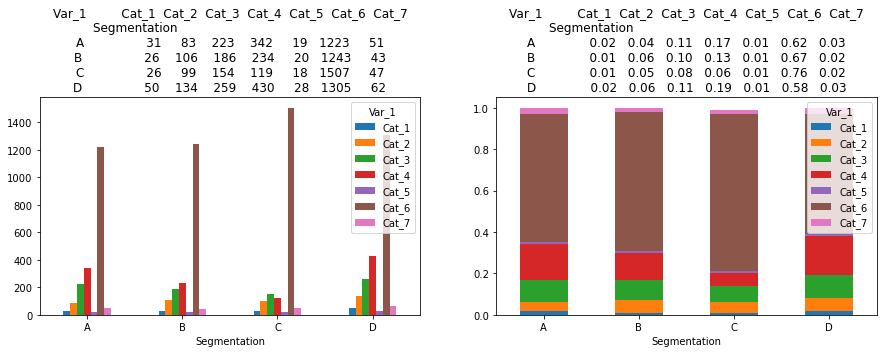

In [16]:
# Counting Var_1 in each segment
ax1 = df.groupby(["Segmentation"])["Var_1"].value_counts().unstack().round(3)

# Percentage of category of Var_1 in each segment
ax2 = df.pivot_table(columns='Var_1',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

most data are from cat_6

###### Check data in Gender Feature

In [17]:
df.Gender.value_counts()

Male      4417
Female    3651
Name: Gender, dtype: int64

In [18]:
# Checking the count of missing values
df.Gender.isnull().sum()

0

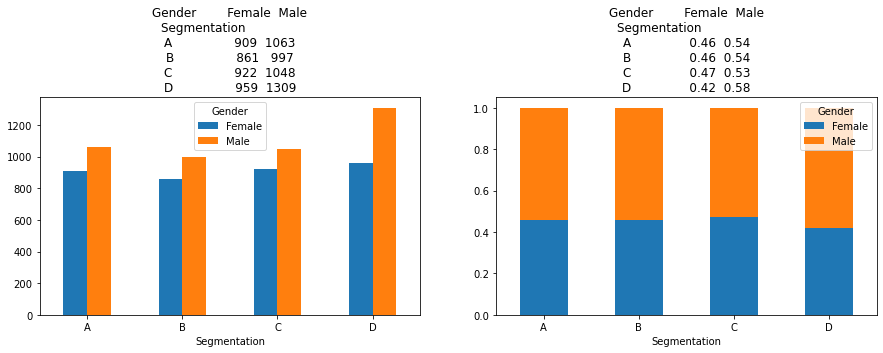

In [19]:
# Counting male-female in each segment
ax1 = df.groupby(["Segmentation"])["Gender"].value_counts().unstack().round(3)

# Percentage of male-female in each segment
ax2 = df.pivot_table(columns='Gender',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

All the 4 segments have around same number of male-female distribution. In all segment male are more than female. <br> 
But segment D has highest male percentage as compared to other segments.

###### Check with Ever Married

In [20]:
df.Ever_Married.value_counts()

Yes    4720
No     3348
Name: Ever_Married, dtype: int64

In [21]:
# Check missing values
df.Ever_Married.isnull().sum()

0

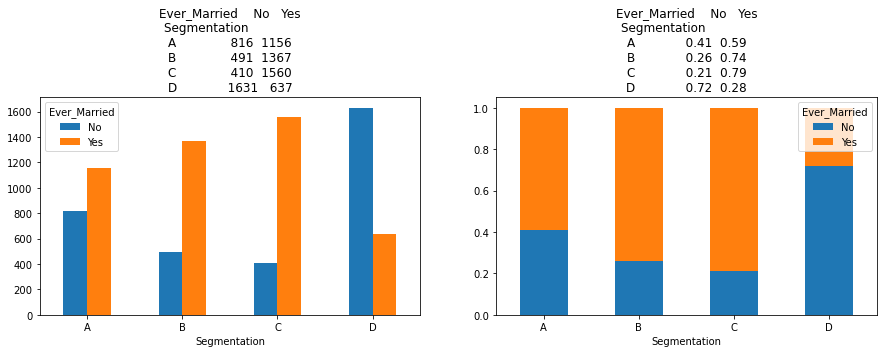

In [22]:
# Counting married and non-married in each segment
ax1 = df.groupby(["Segmentation"])["Ever_Married"].value_counts().unstack().round(3)

# Percentage of married and non-married in each segment
ax2 = df.pivot_table(columns='Ever_Married',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

most of the customers in segment C are married while segment D has least number of married customers.

###### Check with Age

In [23]:
df.Age.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    8068.000000
mean       43.466906
std        16.711696
min        18.000000
25%        30.000000
50%        40.000000
75%        53.000000
90%        69.000000
95%        77.000000
99%        87.000000
max        89.000000
Name: Age, dtype: float64

In [24]:
# Checking the count of missing values
df.Age.isnull().sum()

0

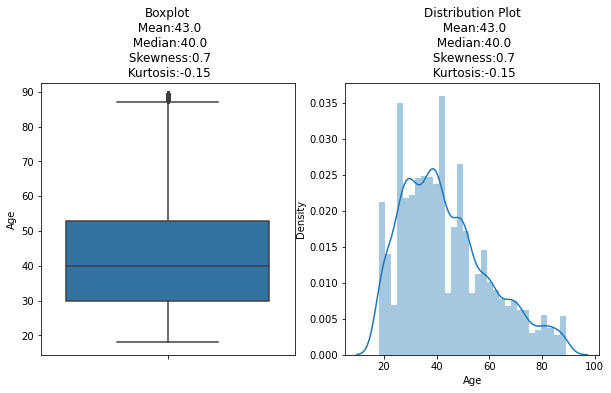

In [25]:
# Looking the distribution of column Age
plt.figure(figsize=(10,5))

skewness = round(df.Age.skew(),2)
kurtosis = round(df.Age.kurtosis(),2)
mean = round(np.mean(df.Age),0)
median = np.median(df.Age)

plt.subplot(1,2,1)
sns.boxplot(y=df.Age)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(1,2,2)
sns.distplot(df.Age)
plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.show()

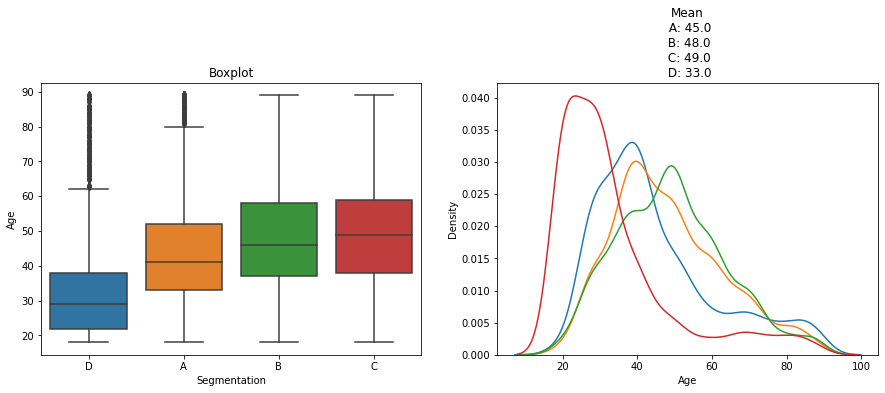

In [137]:
# Looking the distribution of column Age w.r.t to each segment
a = df[df.Segmentation =='A']["Age"]
b = df[df.Segmentation =='B']["Age"]
c = df[df.Segmentation =='C']["Age"]
d = df[df.Segmentation =='D']["Age"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = df, x = "Segmentation", y="Age")
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(a,shade= False, label = 'A')
sns.kdeplot(b,shade= False, label = 'B')
sns.kdeplot(c,shade= False, label = 'C')
sns.kdeplot(d,shade= False, label = 'D')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()

segment D: young people(around 30) and not married
segment C: old people around 50 and had married 

##### Create age bin 

In [27]:
df['Age'] = df['Age'].astype(int)

In [28]:
df.Age.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    8068.000000
mean       43.466906
std        16.711696
min        18.000000
25%        30.000000
50%        40.000000
75%        53.000000
90%        69.000000
95%        77.000000
99%        87.000000
max        89.000000
Name: Age, dtype: float64

In [29]:
# Divide people in the 4 age group
df['Age_Bin'] = pd.cut(df.Age,bins=[17,30,45,60,90],labels=['17-30','31-45','46-60','60+'])

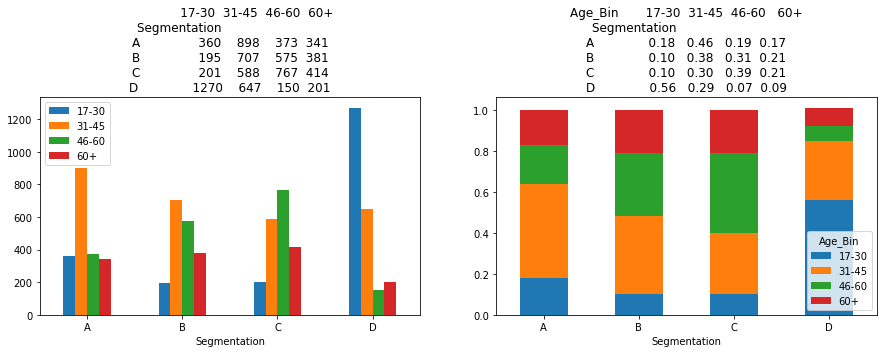

In [30]:
# Counting different age group in each segment
ax1 = df.groupby(["Segmentation"])["Age_Bin"].value_counts().unstack().round(3)

# Percentage of age bins in each segment
ax2 = df.pivot_table(columns='Age_Bin',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

###### Check with Graduated

In [31]:
print('Count of each graduate and non-graduate\n',df.Graduated.value_counts())

Count of each graduate and non-graduate
 Yes    5032
No     3036
Name: Graduated, dtype: int64


In [32]:
# Checking the count of missing values
df.Graduated.isnull().sum()

0

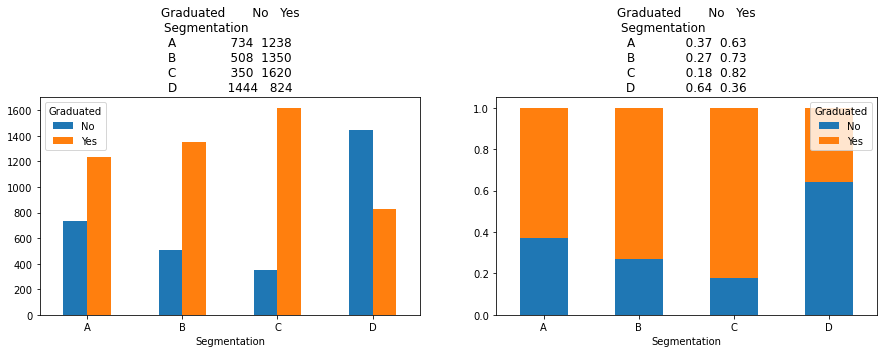

In [33]:
# Counting graduate and non-graduate in each segment
ax1 = df.groupby(["Segmentation"])["Graduated"].value_counts().unstack().round(3)

# Percentage of graduate and non-graduate in each segment
ax2 = df.pivot_table(columns='Graduated',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

Segment C has most number of customers who are graduated while segment D has lowest number of graduate customers.

###### Check with Profession Features

In [34]:
print('Count of each profession\n',df.Profession.value_counts())

Count of each profession
 Artist           2552
Healthcare       1352
Entertainment     949
Engineer          699
Doctor            688
Lawyer            685
Executive         599
Marketing         292
Homemaker         252
Name: Profession, dtype: int64


In [35]:
# Checking the count of missing values
df.Profession.isnull().sum()

0

In [36]:
# Filling the missing values w.r.t other attributes underlying pattern
df.loc[ (pd.isnull(df["Profession"])) & (df['Work_Experience'] > 8),"Profession"] = 'Homemaker'
df.loc[ (pd.isnull(df["Profession"])) & (df['Age'] > 70),"Profession"] = 'Lawyer'
df.loc[ (pd.isnull(df["Profession"])) & (df['Family_Size'] < 3),"Profession"] = 'Lawyer'
df.loc[ (pd.isnull(df["Profession"])) & (df['Spending_Score'] == 'Average'),"Profession"] = 'Artist'
df.loc[ (pd.isnull(df["Profession"])) & (df['Graduated'] == 'Yes'),"Profession"] = 'Artist'
df.loc[ (pd.isnull(df["Profession"])) & (df['Ever_Married'] == 'Yes'),"Profession"] = 'Artist'
df.loc[ (pd.isnull(df["Profession"])) & (df['Ever_Married'] == 'No'),"Profession"] = 'Healthcare'
df.loc[ (pd.isnull(df["Profession"])) & (df['Spending_Score'] == 'High'),"Profession"] = 'Executives'

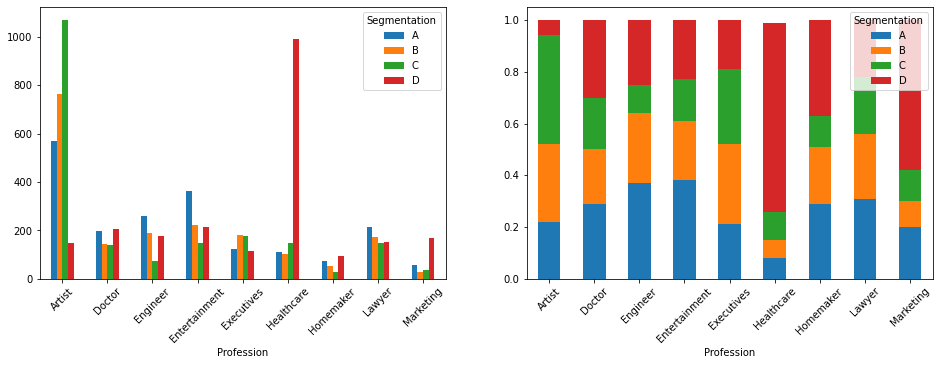

In [37]:
# Count of segments in each profession
ax1 = df.groupby(["Profession"])["Segmentation"].value_counts().unstack().round(3)

# Percentage of segments in each profession
ax2 = df.pivot_table(columns='Segmentation',index='Profession',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (16,5))
label = ['Artist','Doctor','Engineer','Entertainment','Executives','Healthcare','Homemaker','Lawyer','Marketing']
ax[0].set_xticklabels(labels = label,rotation = 45)

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (16,5))
ax[1].set_xticklabels(labels = label,rotation = 45)

plt.show()

<font color='blue'>Segment A,B and C have major customers from profession:**Artist** while Segment D have major customers from profession:**Healthcare** <br>
**Homemaker** is least in all the four segment

###### Work Experience

In [38]:
df.Work_Experience.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    8068.000000
mean        2.618741
std         3.394284
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
90%         8.000000
95%         9.000000
99%        13.000000
max        14.000000
Name: Work_Experience, dtype: float64

In [39]:
# Checking the count of missing values
df.Work_Experience.isnull().sum()

0

In [40]:
# Replacing NaN with previous values
df['Work_Experience'] = df['Work_Experience'].fillna(method='pad')

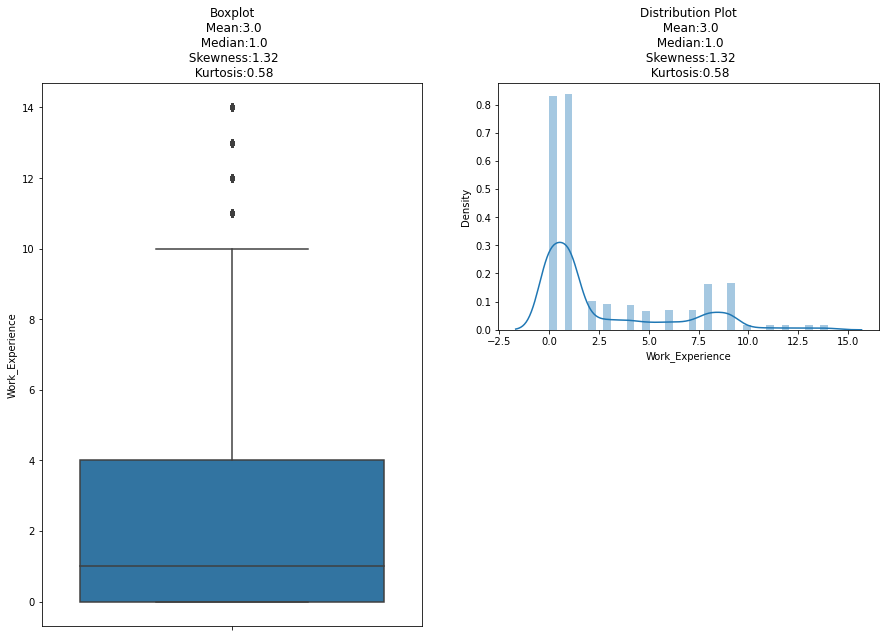

In [41]:
# Looking the distribution of column Work Experience
plt.figure(figsize=(15,10))

skewness = round(df.Work_Experience.skew(),2)
kurtosis = round(df.Work_Experience.kurtosis(),2)
mean = round(np.mean(df.Work_Experience),0)
median = np.median(df.Work_Experience)

plt.subplot(1,2,1)
sns.boxplot(y=df.Work_Experience)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(2,2,2)
sns.distplot(df.Work_Experience)
plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.show()

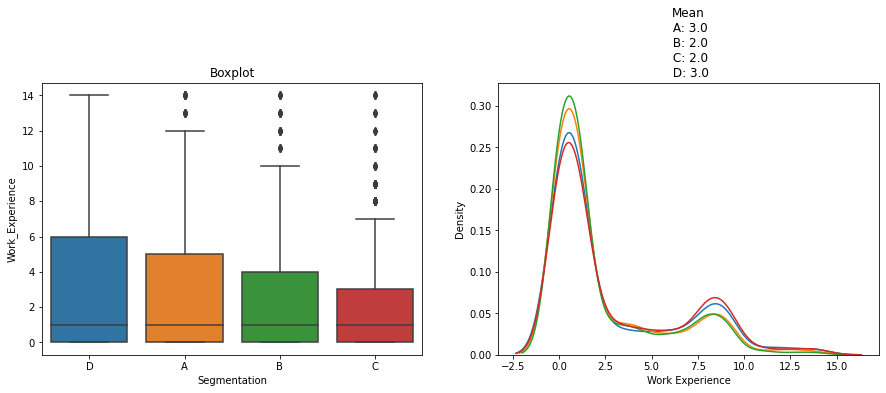

In [42]:
# Looking the distribution of column Work_Experience w.r.t to each segment
a = df[df.Segmentation =='A']["Work_Experience"]
b = df[df.Segmentation =='B']["Work_Experience"]
c = df[df.Segmentation =='C']["Work_Experience"]
d = df[df.Segmentation =='D']["Work_Experience"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = df, x = "Segmentation", y="Work_Experience")
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(a,shade= False, label = 'A')
sns.kdeplot(b,shade= False, label = 'B')
sns.kdeplot(c,shade= False, label = 'C')
sns.kdeplot(d,shade= False, label = 'D')
plt.xlabel('Work Experience')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()

Segment D has people with relatively more experienced than other segments while Segment C has people with low experience

In [43]:
# Changing the data type
df['Work_Experience'] = df['Work_Experience'].astype(int)

In [44]:
df.Work_Experience.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    8068.000000
mean        2.618741
std         3.394284
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
90%         8.000000
95%         9.000000
99%        13.000000
max        14.000000
Name: Work_Experience, dtype: float64

In [45]:
# Dividing the people into 3 category of work experience 
df['Work_Exp_Category'] = pd.cut(df.Work_Experience,bins=[-1,1,7,15],labels=['Low Experience','Medium Experience','High Experience'])

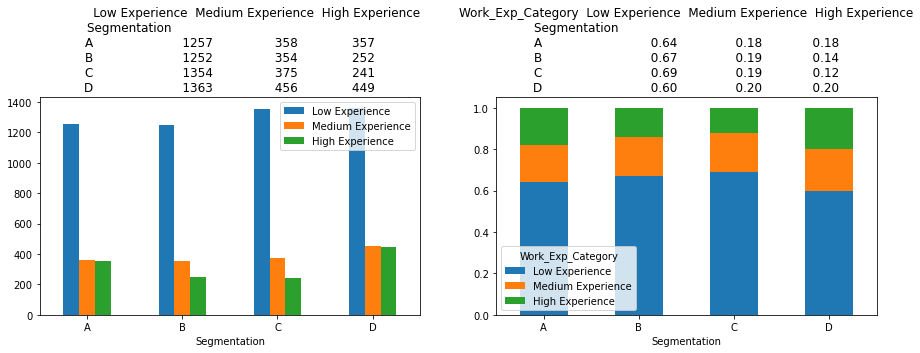

In [46]:
# Counting different category of work experience in each segment
ax1 = df.groupby(["Segmentation"])["Work_Exp_Category"].value_counts().unstack().round(3)

# Percentage of work experience in each segment
ax2 = df.pivot_table(columns='Work_Exp_Category',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

###### Spending Score

In [47]:
print('Count of spending score\n',df.Spending_Score.value_counts())

Count of spending score
 Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64


In [48]:
# Checking the count of missing values
df.Spending_Score.isnull().sum()

0

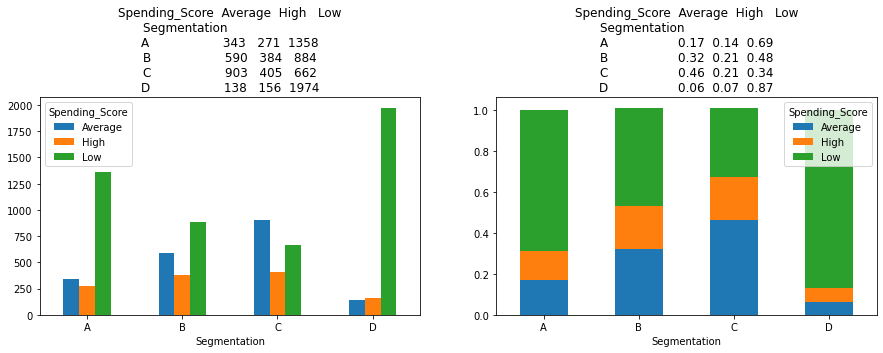

In [49]:
# Counting different category of spending score in each segment
ax1 = df.groupby(["Segmentation"])["Spending_Score"].value_counts().unstack().round(3)

# Percentage of spending score in each segment
ax2 = df.pivot_table(columns='Spending_Score',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

Segment D has maximum number of people with low spending score while in Segment C average spending people are more.

###### Family Size

In [50]:
df.Family_Size.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    8068.000000
mean        2.819038
std         1.512798
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
90%         5.000000
95%         5.650000
99%         8.000000
max         9.000000
Name: Family_Size, dtype: float64

In [51]:
# Checking the count of missing values
df.Family_Size.isnull().sum()

0

In [52]:
# Filling the missing values w.r.t other attributes underlying pattern
df.loc[ (pd.isnull(df["Family_Size"])) & (df['Ever_Married'] == 'Yes'),"Family_Size"] = 2.0
df.loc[ (pd.isnull(df["Family_Size"])) & (df['Var_1'] == 'Cat_6'),"Family_Size"] = 2.0
df.loc[ (pd.isnull(df["Family_Size"])) & (df['Graduated'] == 'Yes'),"Family_Size"] = 2.0

# Fill remaining NaN with previous values
df['Family_Size'] = df['Family_Size'].fillna(method='pad')

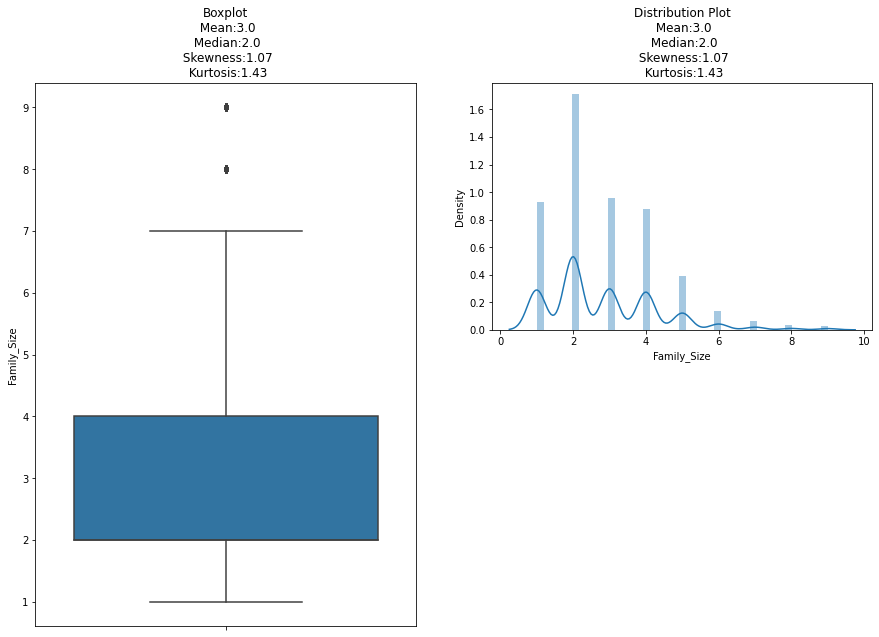

In [53]:
# Looking the distribution of column Work Experience
plt.figure(figsize=(15,10))

skewness = round(df.Family_Size.skew(),2)
kurtosis = round(df.Family_Size.kurtosis(),2)
mean = round(np.mean(df.Family_Size),0)
median = np.median(df.Family_Size)

plt.subplot(1,2,1)
sns.boxplot(y=df.Family_Size)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(2,2,2)
sns.distplot(df.Family_Size)
plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.show()

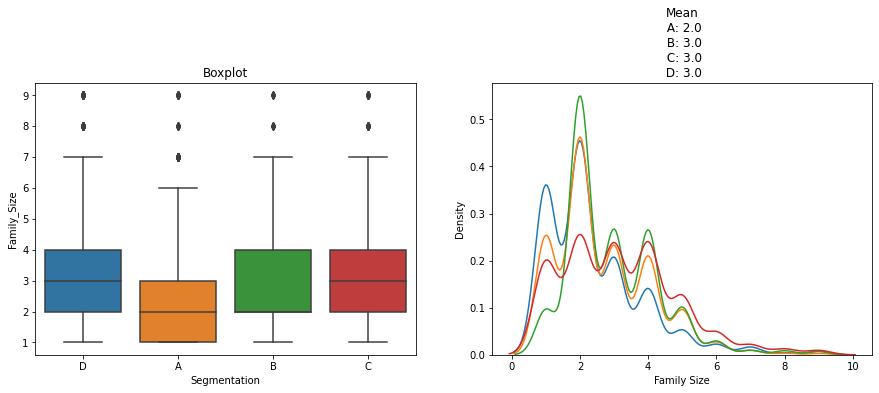

In [54]:
# Looking the distribution of column Family Size w.r.t to each segment
a = df[df.Segmentation =='A']["Family_Size"]
b = df[df.Segmentation =='B']["Family_Size"]
c = df[df.Segmentation =='C']["Family_Size"]
d = df[df.Segmentation =='D']["Family_Size"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = df, x = "Segmentation", y="Family_Size")
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(a,shade= False, label = 'A')
sns.kdeplot(b,shade= False, label = 'B')
sns.kdeplot(c,shade= False, label = 'C')
sns.kdeplot(d,shade= False, label = 'D')
plt.xlabel('Family Size')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()

In [55]:
# Changing the data type
df['Family_Size'] = df['Family_Size'].astype(int)

In [56]:
df.Family_Size.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    8068.000000
mean        2.819038
std         1.512798
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
90%         5.000000
95%         5.650000
99%         8.000000
max         9.000000
Name: Family_Size, dtype: float64

In [57]:
# Divide family size into 3 category
df['Family_Size_Category'] = pd.cut(df.Family_Size,bins=[0,4,6,10],labels=['Small Family','Big Family','Joint Family'])

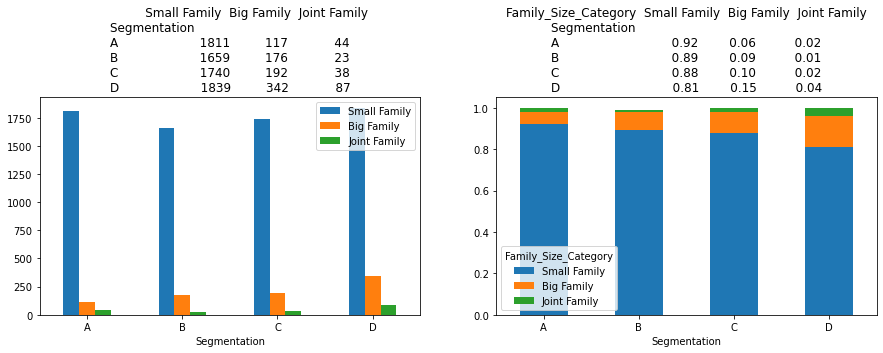

In [58]:
# Counting different category of family size in each segment
ax1 = df.groupby(["Segmentation"])["Family_Size_Category"].value_counts().unstack().round(3)

# Percentage of family size in each segment
ax2 = df.pivot_table(columns='Family_Size_Category',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

<font color='blue'>In the given data it is observed that most of the people have family size of 1 or 2 (i.e. they have small family).<br> But Segment D has more number of  big families as compared to other segments.

###### Segmentation

In [59]:
print('Count of each category of segmentation\n',df.Segmentation.value_counts())

Count of each category of segmentation
 D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64


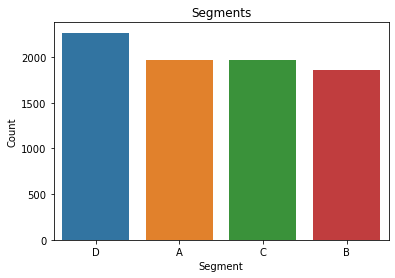

In [60]:
segments = df.loc[:,"Segmentation"].value_counts()
plt.xlabel("Segment")
plt.ylabel('Count')
sns.barplot(segments.index , segments.values).set_title('Segments')
plt.show()

In [61]:
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    8068 non-null   int64   
 1   Gender                8068 non-null   object  
 2   Ever_Married          8068 non-null   object  
 3   Age                   8068 non-null   int32   
 4   Graduated             8068 non-null   object  
 5   Profession            8068 non-null   object  
 6   Work_Experience       8068 non-null   int32   
 7   Spending_Score        8068 non-null   object  
 8   Family_Size           8068 non-null   int32   
 9   Var_1                 8068 non-null   object  
 10  Segmentation          8068 non-null   object  
 11  Age_Bin               8068 non-null   category
 12  Work_Exp_Category     8068 non-null   category
 13  Family_Size_Category  8068 non-null   category
dtypes: category(3), int32(3), int64(1), object(7)
memory usa

In [62]:
# number of unique ids
df.ID.nunique()

8068

In [63]:
df.describe(include='all')

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Bin,Work_Exp_Category,Family_Size_Category
count,8068.000000,8068,8068,8068.000000,8068,8068,8068.000000,8068,8068.000000,8068,8068,8068,8068,8068
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4,4,3,3
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D,31-45,Low Experience,Small Family
freq,NaN,4417,4720,NaN,5032,2552,NaN,4878,NaN,5278,2268,2840,5226,7049
mean,463479.214551,NaN,NaN,43.466906,NaN,NaN,2.618741,NaN,2.819038,NaN,NaN,NaN,NaN,NaN
std,2595.381232,NaN,NaN,16.711696,NaN,NaN,3.394284,NaN,1.512798,NaN,NaN,NaN,NaN,NaN
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,461240.750000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
50%,463472.500000,NaN,NaN,40.000000,NaN,NaN,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
75%,465744.250000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN


In [64]:
df = df[['ID','Gender', 'Ever_Married', 'Age', 'Age_Bin', 'Graduated', 'Profession', 'Work_Experience', 'Work_Exp_Category',
         'Spending_Score', 'Family_Size', 'Family_Size_Category','Var_1', 'Segmentation']]
df.head(10)

,ID,Gender,Ever_Married,Age,Age_Bin,Graduated,Profession,Work_Experience,Work_Exp_Category,Spending_Score,Family_Size,Family_Size_Category,Var_1,Segmentation
0,462809,Male,No,22,17-30,No,Healthcare,1,Low Experience,Low,4,Small Family,Cat_4,D
1,462643,Female,Yes,38,31-45,Yes,Engineer,1,Low Experience,Average,3,Small Family,Cat_4,A
2,466315,Female,Yes,67,60+,Yes,Engineer,1,Low Experience,Low,1,Small Family,Cat_6,B
3,461735,Male,Yes,67,60+,Yes,Lawyer,0,Low Experience,High,2,Small Family,Cat_6,B
4,462669,Female,Yes,40,31-45,Yes,Entertainment,0,Low Experience,High,6,Big Family,Cat_6,A
5,461319,Male,Yes,56,46-60,No,Artist,0,Low Experience,Average,2,Small Family,Cat_6,C
6,460156,Male,No,32,31-45,Yes,Healthcare,1,Low Experience,Low,3,Small Family,Cat_6,C
7,464347,Female,No,33,31-45,Yes,Healthcare,1,Low Experience,Low,3,Small Family,Cat_6,D
8,465015,Female,Yes,61,60+,Yes,Engineer,0,Low Experience,Low,3,Small Family,Cat_7,D
9,465176,Female,Yes,55,46-60,Yes,Artist,1,Low Experience,Average,4,Small Family,Cat_6,C


### Spliting data 

In [65]:
df1 = df.copy()
df1.head()

,ID,Gender,Ever_Married,Age,Age_Bin,Graduated,Profession,Work_Experience,Work_Exp_Category,Spending_Score,Family_Size,Family_Size_Category,Var_1,Segmentation
0,462809,Male,No,22,17-30,No,Healthcare,1,Low Experience,Low,4,Small Family,Cat_4,D
1,462643,Female,Yes,38,31-45,Yes,Engineer,1,Low Experience,Average,3,Small Family,Cat_4,A
2,466315,Female,Yes,67,60+,Yes,Engineer,1,Low Experience,Low,1,Small Family,Cat_6,B
3,461735,Male,Yes,67,60+,Yes,Lawyer,0,Low Experience,High,2,Small Family,Cat_6,B
4,462669,Female,Yes,40,31-45,Yes,Entertainment,0,Low Experience,High,6,Big Family,Cat_6,A


In [66]:
# Separating dependent-independent variables
X = df1.drop('Segmentation',axis=1)
y = df1['Segmentation']

In [67]:
# import the train-test split
from sklearn.model_selection import train_test_split

# divide into train and test sets
df1_trainX, df1_testX, df1_trainY, df1_testY = train_test_split(X,y, train_size = 0.7, random_state = 101, stratify=y)

###### Preprocessing on train data

In [68]:
# converting binary variables to numeric
df1_trainX['Gender'] = df1_trainX['Gender'].replace(('Male','Female'),(1,0))
df1_trainX['Ever_Married'] = df1_trainX['Ever_Married'].replace(('Yes','No'),(1,0))
df1_trainX['Graduated'] = df1_trainX['Graduated'].replace(('Yes','No'),(1,0))
df1_trainX['Spending_Score'] = df1_trainX['Spending_Score'].replace(('High','Average','Low'),(3,2,1))

# converting nominal variables into dummy variables
pf = pd.get_dummies(df1_trainX.Profession,prefix='Profession')
df1_trainX = pd.concat([df1_trainX,pf],axis=1)

vr = pd.get_dummies(df1_trainX.Var_1,prefix='Var_1')
df1_trainX = pd.concat([df1_trainX,vr],axis=1)

# scaling continuous variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1_trainX[['Age','Work_Experience','Family_Size']] = scaler.fit_transform(df1_trainX[['Age','Work_Experience','Family_Size']])

df1_trainX.drop(['ID','Age_Bin','Profession','Work_Exp_Category','Family_Size_Category','Var_1'], axis=1, inplace=True)

###### Preprocessing on test data

In [69]:
# converting binary variables to numeric
df1_testX['Gender'] = df1_testX['Gender'].replace(('Male','Female'),(1,0))
df1_testX['Ever_Married'] = df1_testX['Ever_Married'].replace(('Yes','No'),(1,0))
df1_testX['Graduated'] = df1_testX['Graduated'].replace(('Yes','No'),(1,0))
df1_testX['Spending_Score'] = df1_testX['Spending_Score'].replace(('High','Average','Low'),(3,2,1))

# converting nominal variables into dummy variables
pf = pd.get_dummies(df1_testX.Profession,prefix='Profession')
df1_testX = pd.concat([df1_testX,pf],axis=1)

vr = pd.get_dummies(df1_testX.Var_1,prefix='Var_1')
df1_testX = pd.concat([df1_testX,vr],axis=1)

# scaling continuous variables
df1_testX[['Age','Work_Experience','Family_Size']] = scaler.transform(df1_testX[['Age','Work_Experience','Family_Size']])

df1_testX.drop(['ID','Age_Bin','Profession','Work_Exp_Category','Family_Size_Category','Var_1'], axis=1, inplace=True)

In [70]:
df1_trainX.shape, df1_trainY.shape, df1_testX.shape, df1_testY.shape

((5647, 23), (5647,), (2421, 23), (2421,))

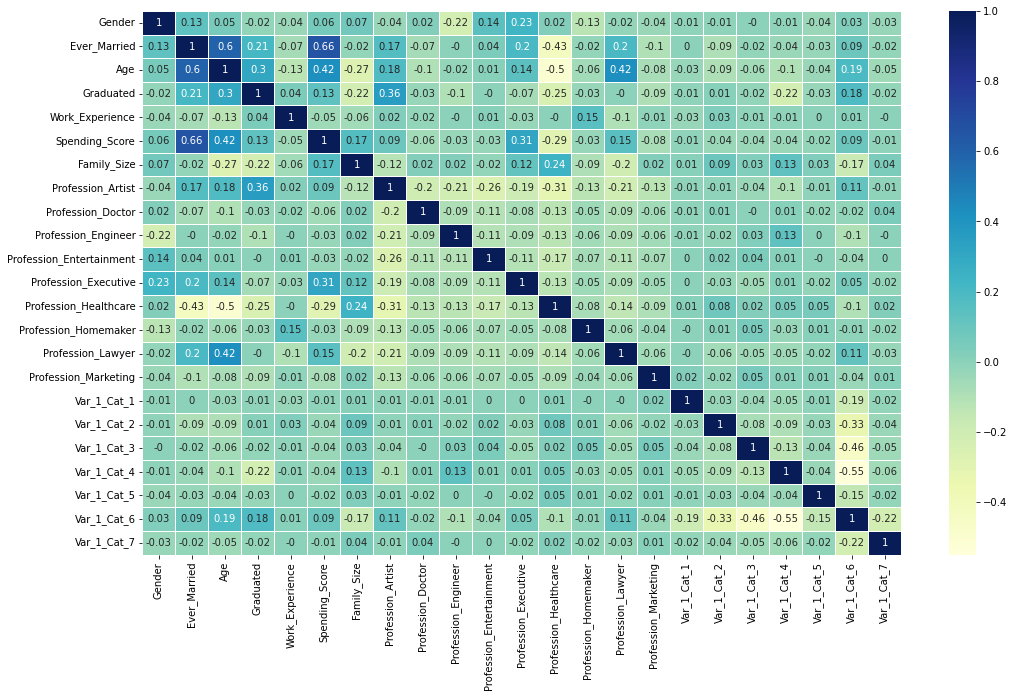

In [71]:
# Correlation matrix
plt.figure(figsize=(17,10))
sns.heatmap(df1_trainX.corr(method='spearman').round(2),linewidth = 0.5,annot=True,cmap="YlGnBu")
plt.show()

---
## Model Building

### kNN

In [72]:
train_knn1_x = df1_trainX.copy()
train_knn1_x.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
2910,1,1,0.239437,1,0.000000,2,0.125,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1562,0,1,0.478873,0,0.642857,2,0.375,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2697,0,1,0.887324,1,0.571429,3,0.125,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5723,1,1,0.549296,1,0.071429,3,0.125,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2172,1,0,0.154930,1,0.357143,1,0.000,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [73]:
train_knn1_y = df1_trainY.copy()
train_knn1_y.head()

2910    C
1562    B
2697    C
5723    B
2172    D
Name: Segmentation, dtype: object

In [74]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the model
model_knn1 = KNeighborsClassifier(n_neighbors=3)

#fitting the model
model_knn1.fit(train_knn1_x, train_knn1_y)

#checking the training score
print('Accuracy on training: ',model_knn1.score(train_knn1_x, train_knn1_y))

# predict the target on the train dataset
yhat1 = model_knn1.predict(train_knn1_x)

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(train_knn1_y.values, yhat1, labels=["A","B","C","D"])
print('-------The confusion matrix for this model is-------')
print(cm1)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_knn1_y.values, yhat1))

Accuracy on training:  0.6881530015937666
-------The confusion matrix for this model is-------
[[1078  115   78  109]
 [ 338  746  171   46]
 [ 255  162  899   63]
 [ 291  101   32 1163]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           A       0.55      0.78      0.65      1380
           B       0.66      0.57      0.62      1301
           C       0.76      0.65      0.70      1379
           D       0.84      0.73      0.78      1587

    accuracy                           0.69      5647
   macro avg       0.70      0.68      0.69      5647
weighted avg       0.71      0.69      0.69      5647



In [75]:
# Function for checking the optimal number of k
train_accuracy = []
for k in range(1,11):
    model_knn1 = KNeighborsClassifier(n_neighbors=k)
    model_knn1.fit(train_knn1_x, train_knn1_y)
    train_accuracy.append(model_knn1.score(train_knn1_x, train_knn1_y))

In [76]:
frame = pd.DataFrame({'no.of k':range(1,11), 'train_acc':train_accuracy})
frame

,no.of k,train_acc
0,1,0.962104
1,2,0.719320
2,3,0.688153
3,4,0.658226
4,5,0.635559
5,6,0.617496
6,7,0.613069
7,8,0.602444
8,9,0.588631
9,10,0.586506


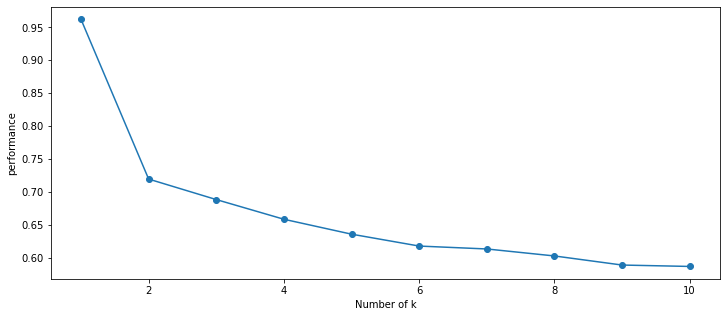

In [77]:
# Elbow curve
plt.figure(figsize=(12,5))
plt.plot(frame['no.of k'], frame['train_acc'], marker='o')
plt.xlabel('Number of k')
plt.ylabel('performance')
plt.show()

In [78]:
# final model
model_knn1 = KNeighborsClassifier(n_neighbors=2)

# fitting the model
model_knn1.fit(train_knn1_x, train_knn1_y)

# Training score
print(model_knn1.score(train_knn1_x, train_knn1_y).round(4))

0.7193


#### Predicting on test set

In [79]:
test_knn1_x = df1_testX.copy()
test_knn1_x.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
7787,0,1,0.281690,1,0.357143,2,0.125,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5676,0,0,0.098592,0,0.071429,1,0.250,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3578,0,0,0.014085,0,0.214286,1,0.250,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5082,0,1,0.267606,0,0.071429,1,0.250,1,0,0,...,0,0,0,0,0,0,0,0,1,0
896,0,0,0.281690,1,0.571429,1,0.250,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [80]:
test_knn1_y = df1_testY.copy()
test_knn1_y.head()

7787    C
5676    B
3578    D
5082    B
896     D
Name: Segmentation, dtype: object

In [81]:
y_knn1 = model_knn1.predict(test_knn1_x)
y_knn1

array(['C', 'A', 'D', ..., 'C', 'D', 'B'], dtype=object)

In [82]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_knn1_y.values, y_knn1, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_knn1_y.values, y_knn1))

-------The confusion matrix for test data is-------

[[326 147  70  49]
 [250 191  89  27]
 [161 216 177  37]
 [229  98  60 294]]


-------Printing the report of test data-------

              precision    recall  f1-score   support

           A       0.34      0.55      0.42       592
           B       0.29      0.34      0.32       557
           C       0.45      0.30      0.36       591
           D       0.72      0.43      0.54       681

    accuracy                           0.41      2421
   macro avg       0.45      0.41      0.41      2421
weighted avg       0.46      0.41      0.41      2421



In [83]:
pd.Series(y_knn1).value_counts()

A    966
B    652
D    407
C    396
dtype: int64

---
## Model Evaluation

In [84]:
print('************************  MODEL REPORT  *********************************\n')
print('Train data')
print(classification_report(train_knn1_y.values, yhat1))
print('\nTest data')
print(classification_report(test_knn1_y.values, y_knn1))

************************  MODEL REPORT  *********************************

Train data
              precision    recall  f1-score   support

           A       0.55      0.78      0.65      1380
           B       0.66      0.57      0.62      1301
           C       0.76      0.65      0.70      1379
           D       0.84      0.73      0.78      1587

    accuracy                           0.69      5647
   macro avg       0.70      0.68      0.69      5647
weighted avg       0.71      0.69      0.69      5647


Test data
              precision    recall  f1-score   support

           A       0.34      0.55      0.42       592
           B       0.29      0.34      0.32       557
           C       0.45      0.30      0.36       591
           D       0.72      0.43      0.54       681

    accuracy                           0.41      2421
   macro avg       0.45      0.41      0.41      2421
weighted avg       0.46      0.41      0.41      2421



# Random Forest

In [85]:
train_rf1_x = df1_trainX.copy()
train_rf1_x.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
2910,1,1,0.239437,1,0.000000,2,0.125,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1562,0,1,0.478873,0,0.642857,2,0.375,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2697,0,1,0.887324,1,0.571429,3,0.125,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5723,1,1,0.549296,1,0.071429,3,0.125,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2172,1,0,0.154930,1,0.357143,1,0.000,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [86]:
train_rf1_y = df1_trainY.copy()
train_rf1_y.head()

2910    C
1562    B
2697    C
5723    B
2172    D
Name: Segmentation, dtype: object

In [87]:
# Importing the library
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier with 20 decision tree
rfc1 = RandomForestClassifier(random_state=0,n_estimators=20)

# Train model
model_rfc1 = rfc1.fit(train_rf1_x, train_rf1_y)

# Predicting the classes
yhat3 = rfc1.predict(train_rf1_x)

# view the feature scores
feature_scores = pd.Series(rfc1.feature_importances_, index=train_rf1_x.columns).sort_values(ascending=False)
print('The importance of features ranked from high to low:\n',feature_scores)

from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(train_rf1_y.values, yhat3, labels=["A","B","C","D"])
print('\n\n-------The confusion matrix for this model is-------')
print(cm3)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_rf1_y.values, yhat3))

The importance of features ranked from high to low:
 Age                         0.357444
Work_Experience             0.147951
Family_Size                 0.116543
Spending_Score              0.055849
Profession_Healthcare       0.042989
Graduated                   0.038167
Gender                      0.037125
Profession_Artist           0.033876
Ever_Married                0.027446
Var_1_Cat_6                 0.020932
Var_1_Cat_4                 0.016481
Var_1_Cat_3                 0.013724
Profession_Entertainment    0.013117
Profession_Engineer         0.011245
Var_1_Cat_2                 0.011050
Profession_Doctor           0.010942
Profession_Marketing        0.008661
Profession_Lawyer           0.007390
Profession_Executive        0.007123
Var_1_Cat_7                 0.006641
Profession_Homemaker        0.006240
Var_1_Cat_1                 0.005502
Var_1_Cat_5                 0.003563
dtype: float64


-------The confusion matrix for this model is-------
[[1323   26   19   12]
 [ 

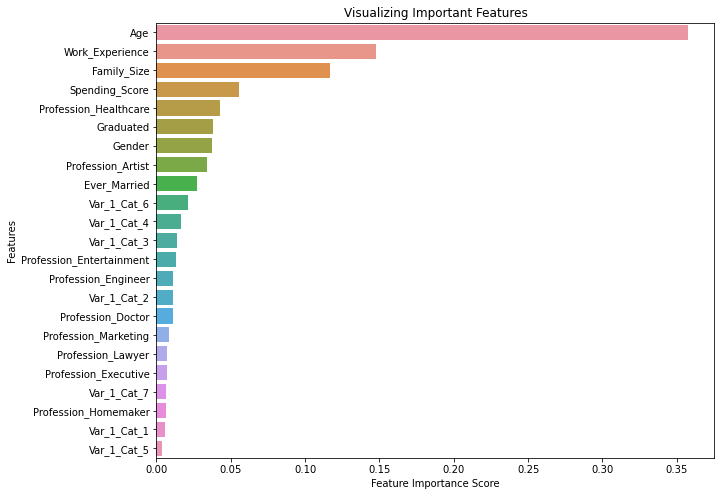

In [88]:
# Creating bar plot of scores of variables importance
plt.figure(figsize=(10,8))
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

###### Predict on test set

In [89]:
test_rf1_x = df1_testX.copy()
test_rf1_x.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
7787,0,1,0.281690,1,0.357143,2,0.125,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5676,0,0,0.098592,0,0.071429,1,0.250,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3578,0,0,0.014085,0,0.214286,1,0.250,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5082,0,1,0.267606,0,0.071429,1,0.250,1,0,0,...,0,0,0,0,0,0,0,0,1,0
896,0,0,0.281690,1,0.571429,1,0.250,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [90]:
test_rf1_y = df1_testY.copy()
test_rf1_y.head()

7787    C
5676    B
3578    D
5082    B
896     D
Name: Segmentation, dtype: object

In [91]:
y_rf1 = rfc1.predict(test_rf1_x)
y_rf1

array(['C', 'A', 'D', ..., 'C', 'D', 'B'], dtype=object)

In [92]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_rf1_y.values, y_rf1, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_rf1_y.values, y_rf1))

-------The confusion matrix for test data is-------

[[245 138  81 128]
 [163 160 148  86]
 [ 83 121 303  84]
 [145  56  40 440]]


-------Printing the report of test data-------

              precision    recall  f1-score   support

           A       0.39      0.41      0.40       592
           B       0.34      0.29      0.31       557
           C       0.53      0.51      0.52       591
           D       0.60      0.65      0.62       681

    accuracy                           0.47      2421
   macro avg       0.46      0.46      0.46      2421
weighted avg       0.47      0.47      0.47      2421



In [93]:
pd.Series(y_rf1).value_counts()

D    738
A    636
C    572
B    475
dtype: int64

###### Building the model with second type of dataframe(df_type2)

In [94]:
df2 = df.copy()
df2.head()

,ID,Gender,Ever_Married,Age,Age_Bin,Graduated,Profession,Work_Experience,Work_Exp_Category,Spending_Score,Family_Size,Family_Size_Category,Var_1,Segmentation
0,462809,Male,No,22,17-30,No,Healthcare,1,Low Experience,Low,4,Small Family,Cat_4,D
1,462643,Female,Yes,38,31-45,Yes,Engineer,1,Low Experience,Average,3,Small Family,Cat_4,A
2,466315,Female,Yes,67,60+,Yes,Engineer,1,Low Experience,Low,1,Small Family,Cat_6,B
3,461735,Male,Yes,67,60+,Yes,Lawyer,0,Low Experience,High,2,Small Family,Cat_6,B
4,462669,Female,Yes,40,31-45,Yes,Entertainment,0,Low Experience,High,6,Big Family,Cat_6,A


In [95]:
# Separating dependent-independent variables
X = df2.drop('Segmentation',axis=1)
y = df2['Segmentation']

In [96]:
# import the train-test split
from sklearn.model_selection import train_test_split

# divide into train and test sets
df2_trainX, df2_testX, df2_trainY, df2_testY = train_test_split(X,y, train_size = 0.7, random_state = 101, stratify=y)

In [97]:
# Converting binary to numeric
df2_trainX['Gender'] = df2_trainX['Gender'].replace(('Male','Female'),(1,0))
df2_trainX['Ever_Married'] = df2_trainX['Ever_Married'].replace(('Yes','No'),(1,0))
df2_trainX['Graduated'] = df2_trainX['Graduated'].replace(('Yes','No'),(1,0))

# Converting nominal variables to dummy variables
ab = pd.get_dummies(df2_trainX.Age_Bin,prefix='Age_Bin')
df2_trainX = pd.concat([df2_trainX,ab],axis=1)

pf = pd.get_dummies(df2_trainX.Profession,prefix='Profession')
df2_trainX = pd.concat([df2_trainX,pf],axis=1)

we = pd.get_dummies(df2_trainX.Work_Exp_Category,prefix='WorkExp')
df2_trainX = pd.concat([df2_trainX,we],axis=1)

sc = pd.get_dummies(df2_trainX.Spending_Score,prefix='Spending')
df2_trainX = pd.concat([df2_trainX,sc],axis=1)

fs = pd.get_dummies(df2_trainX.Family_Size_Category,prefix='FamilySize')
df2_trainX = pd.concat([df2_trainX,fs],axis=1)

vr = pd.get_dummies(df2_trainX.Var_1,prefix='Var_1')
df2_trainX = pd.concat([df2_trainX,vr],axis=1)

df2_trainX.drop(['ID','Age','Age_Bin','Profession','Work_Experience','Work_Exp_Category','Spending_Score',
               'Family_Size','Family_Size_Category','Var_1'],axis=1,inplace=True)

In [98]:
# Converting binary to numeric
df2_testX['Gender'] = df2_testX['Gender'].replace(('Male','Female'),(1,0))
df2_testX['Ever_Married'] = df2_testX['Ever_Married'].replace(('Yes','No'),(1,0))
df2_testX['Graduated'] = df2_testX['Graduated'].replace(('Yes','No'),(1,0))

# Converting nominal variables to dummy variables
ab = pd.get_dummies(df2_testX.Age_Bin,prefix='Age_Bin')
df2_testX = pd.concat([df2_testX,ab],axis=1)

pf = pd.get_dummies(df2_testX.Profession,prefix='Profession')
df2_testX = pd.concat([df2_testX,pf],axis=1)

we = pd.get_dummies(df2_testX.Work_Exp_Category,prefix='WorkExp')
df2_testX = pd.concat([df2_testX,we],axis=1)

sc = pd.get_dummies(df2_testX.Spending_Score,prefix='Spending')
df2_testX = pd.concat([df2_testX,sc],axis=1)

fs = pd.get_dummies(df2_testX.Family_Size_Category,prefix='FamilySize')
df2_testX = pd.concat([df2_testX,fs],axis=1)

vr = pd.get_dummies(df2_testX.Var_1,prefix='Var_1')
df2_testX = pd.concat([df2_testX,vr],axis=1)

df2_testX.drop(['ID','Age','Age_Bin','Profession','Work_Experience','Work_Exp_Category','Spending_Score',
               'Family_Size','Family_Size_Category','Var_1'],axis=1,inplace=True)

In [99]:
train_rf2_x = df2_trainX.copy()
train_rf2_x.head()

,Gender,Ever_Married,Graduated,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,...,FamilySize_Small Family,FamilySize_Big Family,FamilySize_Joint Family,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
2910,1,1,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1562,0,1,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2697,0,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5723,1,1,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2172,1,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [100]:
train_rf2_y = df2_trainY.copy()
train_rf2_y.head()

2910    C
1562    B
2697    C
5723    B
2172    D
Name: Segmentation, dtype: object

In [101]:
# Importing the library
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier with 20 decision tree
rfc2 = RandomForestClassifier(random_state=0,n_estimators=20)

# Train model
model_rfc2 = rfc2.fit(train_rf2_x, train_rf2_y)

# Predicting the classes
yhat4 = rfc2.predict(train_rf2_x)

# view the feature scores
feature_scores = pd.Series(rfc2.feature_importances_, index=train_rf2_x.columns).sort_values(ascending=False)
print('The importance of features ranked from high to low:\n',feature_scores)

from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(train_rf2_y.values, yhat4, labels=["A","B","C","D"])
print('\n\n-------The confusion matrix for this model is-------')
print(cm4)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_rf2_y.values, yhat4))

The importance of features ranked from high to low:
 Gender                       0.082688
Graduated                    0.077180
Age_Bin_17-30                0.066022
Profession_Artist            0.059797
Ever_Married                 0.056416
Spending_Low                 0.054400
Profession_Healthcare        0.047072
Var_1_Cat_6                  0.037173
WorkExp_Low Experience       0.036474
WorkExp_Medium Experience    0.032236
Spending_Average             0.032179
WorkExp_High Experience      0.031417
Var_1_Cat_4                  0.029962
Age_Bin_31-45                0.029860
Profession_Entertainment     0.027978
Var_1_Cat_3                  0.027740
Age_Bin_46-60                0.024682
Profession_Doctor            0.024318
FamilySize_Small Family      0.023652
Profession_Engineer          0.022899
Var_1_Cat_2                  0.021006
Age_Bin_60+                  0.020827
FamilySize_Big Family        0.020307
Profession_Marketing         0.017869
Profession_Executive         0.0164

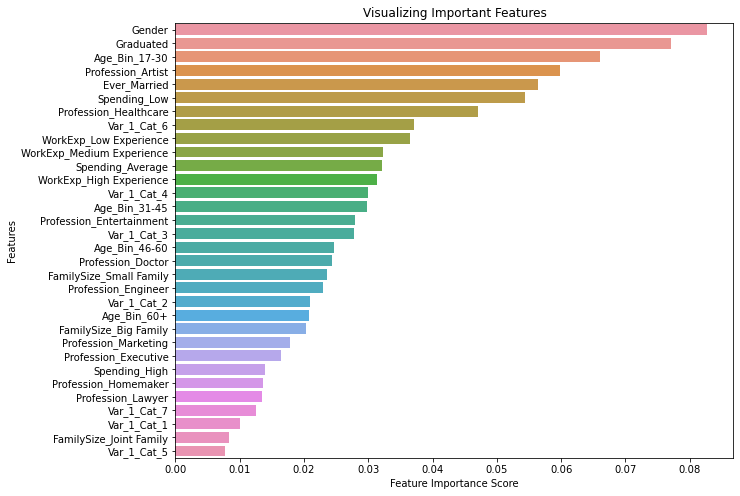

In [102]:
# Creating bar plot of scores of variables importance
plt.figure(figsize=(10,8))
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

###### Predicting on test set

In [103]:
test_rf2_x = df2_testX.copy()
test_rf2_x.head()

,Gender,Ever_Married,Graduated,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,...,FamilySize_Small Family,FamilySize_Big Family,FamilySize_Joint Family,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
7787,0,1,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
5676,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3578,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5082,0,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
896,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [104]:
test_rf2_y = df2_testY.copy()
test_rf2_y.head()

7787    C
5676    B
3578    D
5082    B
896     D
Name: Segmentation, dtype: object

In [105]:
y_rf2 = rfc2.predict(test_rf2_x)
y_rf2

array(['C', 'D', 'D', ..., 'C', 'D', 'B'], dtype=object)

In [106]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_rf2_y.values, y_rf2, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_rf2_y.values, y_rf2))

-------The confusion matrix for test data is-------

[[235 148  69 140]
 [155 160 153  89]
 [ 66 145 286  94]
 [144  56  26 455]]


-------Printing the report of test data-------

              precision    recall  f1-score   support

           A       0.39      0.40      0.39       592
           B       0.31      0.29      0.30       557
           C       0.54      0.48      0.51       591
           D       0.58      0.67      0.62       681

    accuracy                           0.47      2421
   macro avg       0.46      0.46      0.46      2421
weighted avg       0.46      0.47      0.47      2421



In [107]:
pd.Series(y_rf2).value_counts()

D    778
A    600
C    534
B    509
dtype: int64

In [108]:
print('************************  MODEL-1 REPORT  *********************************\n')
print('Train data')
print(classification_report(train_rf1_y.values, yhat3))
print('\nTest data')
print(classification_report(test_rf1_y.values, y_rf1))

************************  MODEL-1 REPORT  *********************************

Train data
              precision    recall  f1-score   support

           A       0.97      0.96      0.96      1380
           B       0.95      0.94      0.94      1301
           C       0.94      0.96      0.95      1379
           D       0.98      0.98      0.98      1587

    accuracy                           0.96      5647
   macro avg       0.96      0.96      0.96      5647
weighted avg       0.96      0.96      0.96      5647


Test data
              precision    recall  f1-score   support

           A       0.39      0.41      0.40       592
           B       0.34      0.29      0.31       557
           C       0.53      0.51      0.52       591
           D       0.60      0.65      0.62       681

    accuracy                           0.47      2421
   macro avg       0.46      0.46      0.46      2421
weighted avg       0.47      0.47      0.47      2421



In [109]:
print('************************  MODEL-2 REPORT  *********************************\n')
print('Train data')
print(classification_report(train_rf2_y.values, yhat4))
print('\nTest data')
print(classification_report(test_rf2_y.values, y_rf2))

************************  MODEL-2 REPORT  *********************************

Train data
              precision    recall  f1-score   support

           A       0.70      0.69      0.69      1380
           B       0.63      0.60      0.62      1301
           C       0.71      0.70      0.71      1379
           D       0.80      0.85      0.82      1587

    accuracy                           0.72      5647
   macro avg       0.71      0.71      0.71      5647
weighted avg       0.71      0.72      0.72      5647


Test data
              precision    recall  f1-score   support

           A       0.39      0.40      0.39       592
           B       0.31      0.29      0.30       557
           C       0.54      0.48      0.51       591
           D       0.58      0.67      0.62       681

    accuracy                           0.47      2421
   macro avg       0.46      0.46      0.46      2421
weighted avg       0.46      0.47      0.47      2421



# Special Prediction on Segment B

In [110]:
df3=df.copy()

In [111]:
df3

,ID,Gender,Ever_Married,Age,Age_Bin,Graduated,Profession,Work_Experience,Work_Exp_Category,Spending_Score,Family_Size,Family_Size_Category,Var_1,Segmentation
0,462809,Male,No,22,17-30,No,Healthcare,1,Low Experience,Low,4,Small Family,Cat_4,D
1,462643,Female,Yes,38,31-45,Yes,Engineer,1,Low Experience,Average,3,Small Family,Cat_4,A
2,466315,Female,Yes,67,60+,Yes,Engineer,1,Low Experience,Low,1,Small Family,Cat_6,B
3,461735,Male,Yes,67,60+,Yes,Lawyer,0,Low Experience,High,2,Small Family,Cat_6,B
4,462669,Female,Yes,40,31-45,Yes,Entertainment,0,Low Experience,High,6,Big Family,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,17-30,No,Healthcare,0,Low Experience,Low,7,Joint Family,Cat_1,D
8064,464685,Male,No,35,31-45,No,Executive,3,Medium Experience,Low,4,Small Family,Cat_4,D
8065,465406,Female,No,33,31-45,Yes,Healthcare,1,Low Experience,Low,1,Small Family,Cat_6,D
8066,467299,Female,No,27,17-30,Yes,Healthcare,1,Low Experience,Low,4,Small Family,Cat_6,B


In [112]:
df3['Segmentation'] = df['Segmentation'].map({'A':'N',
                             'B':'B',
                             'C':'N',
                             'D':'N',
                             },
                             na_action=None)


In [113]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    8068 non-null   int64   
 1   Gender                8068 non-null   object  
 2   Ever_Married          8068 non-null   object  
 3   Age                   8068 non-null   int32   
 4   Age_Bin               8068 non-null   category
 5   Graduated             8068 non-null   object  
 6   Profession            8068 non-null   object  
 7   Work_Experience       8068 non-null   int32   
 8   Work_Exp_Category     8068 non-null   category
 9   Spending_Score        8068 non-null   object  
 10  Family_Size           8068 non-null   int32   
 11  Family_Size_Category  8068 non-null   category
 12  Var_1                 8068 non-null   object  
 13  Segmentation          8068 non-null   object  
dtypes: category(3), int32(3), int64(1), object(7)
memory usa

In [114]:
X = df3.drop('Segmentation',axis=1)
y = df3['Segmentation']

In [115]:
# import the train-test split
from sklearn.model_selection import train_test_split

# divide into train and test sets
df3_trainX, df3_testX, df3_trainY, df3_testY = train_test_split(X,y, train_size = 0.7, random_state = 101, stratify=y)

In [116]:
df3_trainX.shape, df3_trainY.shape, df3_testX.shape, df3_testY.shape

((5647, 13), (5647,), (2421, 13), (2421,))

In [117]:
# Converting binary to numeric
df3_trainX['Gender'] = df3_trainX['Gender'].replace(('Male','Female'),(1,0))
df3_trainX['Ever_Married'] = df3_trainX['Ever_Married'].replace(('Yes','No'),(1,0))
df3_trainX['Graduated'] = df3_trainX['Graduated'].replace(('Yes','No'),(1,0))

# Converting nominal variables to dummy variables
ab = pd.get_dummies(df3_trainX.Age_Bin,prefix='Age_Bin')
df3_trainX = pd.concat([df3_trainX,ab],axis=1)

pf = pd.get_dummies(df3_trainX.Profession,prefix='Profession')
df3_trainX = pd.concat([df3_trainX,pf],axis=1)

we = pd.get_dummies(df3_trainX.Work_Exp_Category,prefix='WorkExp')
df3_trainX = pd.concat([df3_trainX,we],axis=1)

sc = pd.get_dummies(df3_trainX.Spending_Score,prefix='Spending')
df3_trainX = pd.concat([df3_trainX,sc],axis=1)

fs = pd.get_dummies(df3_trainX.Family_Size_Category,prefix='FamilySize')
df3_trainX = pd.concat([df3_trainX,fs],axis=1)

vr = pd.get_dummies(df3_trainX.Var_1,prefix='Var_1')
df3_trainX = pd.concat([df3_trainX,vr],axis=1)

df3_trainX.drop(['ID','Age','Age_Bin','Profession','Work_Experience','Work_Exp_Category','Spending_Score',
               'Family_Size','Family_Size_Category','Var_1'],axis=1,inplace=True)

In [118]:
# Converting binary to numeric
df3_testX['Gender'] = df3_testX['Gender'].replace(('Male','Female'),(1,0))
df3_testX['Ever_Married'] = df3_testX['Ever_Married'].replace(('Yes','No'),(1,0))
df3_testX['Graduated'] = df3_testX['Graduated'].replace(('Yes','No'),(1,0))

# Converting nominal variables to dummy variables
ab = pd.get_dummies(df3_testX.Age_Bin,prefix='Age_Bin')
df3_testX = pd.concat([df3_testX,ab],axis=1)

pf = pd.get_dummies(df3_testX.Profession,prefix='Profession')
df3_testX = pd.concat([df3_testX,pf],axis=1)

we = pd.get_dummies(df3_testX.Work_Exp_Category,prefix='WorkExp')
df3_testX = pd.concat([df3_testX,we],axis=1)

sc = pd.get_dummies(df3_testX.Spending_Score,prefix='Spending')
df3_testX = pd.concat([df3_testX,sc],axis=1)

fs = pd.get_dummies(df3_testX.Family_Size_Category,prefix='FamilySize')
df3_testX = pd.concat([df3_testX,fs],axis=1)

vr = pd.get_dummies(df3_testX.Var_1,prefix='Var_1')
df3_testX = pd.concat([df3_testX,vr],axis=1)

df3_testX.drop(['ID','Age','Age_Bin','Profession','Work_Experience','Work_Exp_Category','Spending_Score',
               'Family_Size','Family_Size_Category','Var_1'],axis=1,inplace=True)

In [119]:
df3_trainX.shape, df3_trainY.shape, df3_testX.shape, df3_testY.shape

((5647, 32), (5647,), (2421, 32), (2421,))

In [120]:
train_rf3_x = df3_trainX.copy()
train_rf3_x.head()

,Gender,Ever_Married,Graduated,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,...,FamilySize_Small Family,FamilySize_Big Family,FamilySize_Joint Family,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
6006,1,1,1,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1689,1,1,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
607,1,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7430,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7564,1,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [121]:
train_rf3_y = df3_trainY.copy()
train_rf3_y.head()

6006    B
1689    N
607     N
7430    N
7564    N
Name: Segmentation, dtype: object

In [122]:
# Importing the library
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier with 20 decision tree
rfc3 = RandomForestClassifier(random_state=0,n_estimators=20)

# Train model
model_rfc3 = rfc3.fit(train_rf3_x, train_rf3_y)

# Predicting the classes
yhat5 = rfc3.predict(train_rf3_x)

# view the feature scores
feature_scores = pd.Series(rfc3.feature_importances_, index=train_rf3_x.columns).sort_values(ascending=False)
print('The importance of features ranked from high to low:\n',feature_scores)

from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(train_rf3_y.values, yhat5, labels=["B","N"])
print('\n\n-------The confusion matrix for this model is-------')
print(cm5)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_rf3_y.values, yhat5))

The importance of features ranked from high to low:
 Gender                       0.098981
Graduated                    0.067499
Profession_Artist            0.051352
Ever_Married                 0.047317
Var_1_Cat_6                  0.045798
Age_Bin_17-30                0.043163
Var_1_Cat_4                  0.040624
WorkExp_Low Experience       0.037969
WorkExp_Medium Experience    0.036934
Age_Bin_31-45                0.036878
Var_1_Cat_3                  0.036246
Age_Bin_46-60                0.035709
Profession_Entertainment     0.031782
WorkExp_High Experience      0.031038
Spending_Low                 0.029301
Profession_Healthcare        0.027203
Age_Bin_60+                  0.027117
Profession_Doctor            0.026368
Var_1_Cat_2                  0.026322
Spending_Average             0.026145
FamilySize_Small Family      0.024660
Profession_Engineer          0.024178
Spending_High                0.020684
FamilySize_Big Family        0.019423
Profession_Homemaker         0.0173

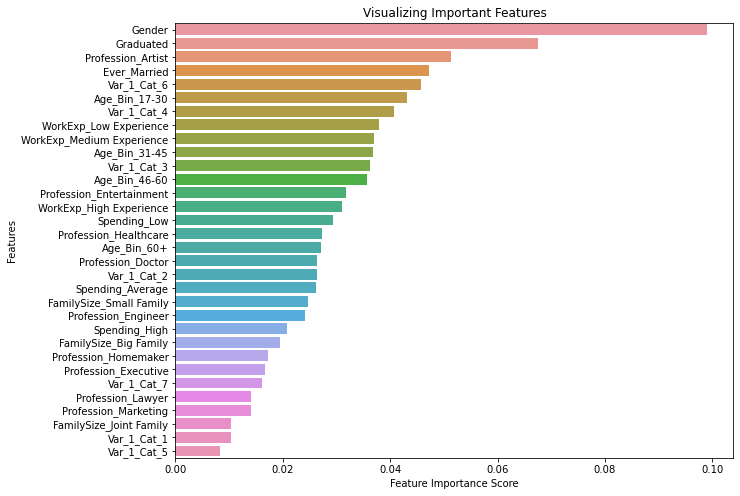

In [123]:
# Creating bar plot of scores of variables importance
plt.figure(figsize=(10,8))
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


In [124]:
test_rf3_x = df3_testX.copy()
test_rf3_x.head()

,Gender,Ever_Married,Graduated,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,...,FamilySize_Small Family,FamilySize_Big Family,FamilySize_Joint Family,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
6864,1,1,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2230,0,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
36,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
983,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1403,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [125]:
test_rf3_y = df3_testY.copy()
test_rf3_y.head()

6864    N
2230    N
36      N
983     N
1403    N
Name: Segmentation, dtype: object

In [126]:
y_rf3 = rfc3.predict(test_rf3_x)
y_rf3

array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype=object)

In [127]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_rf3_y.values, y_rf3, labels=["B","N"]))
from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_rf3_y.values, y_rf3))

-------The confusion matrix for test data is-------

[[  96  462]
 [ 158 1705]]


-------Printing the report of test data-------

              precision    recall  f1-score   support

           B       0.38      0.17      0.24       558
           N       0.79      0.92      0.85      1863

    accuracy                           0.74      2421
   macro avg       0.58      0.54      0.54      2421
weighted avg       0.69      0.74      0.71      2421



In [128]:
print('************************  MODEL REPORT  *********************************\n')
print('Train data')
print(classification_report(train_rf3_y.values, yhat5))
print('\nTest data')
print(classification_report(test_rf3_y.values, y_rf3))

************************  MODEL-2 REPORT  *********************************

Train data
              precision    recall  f1-score   support

           B       0.83      0.43      0.56      1300
           N       0.85      0.97      0.91      4347

    accuracy                           0.85      5647
   macro avg       0.84      0.70      0.73      5647
weighted avg       0.84      0.85      0.83      5647


Test data
              precision    recall  f1-score   support

           B       0.38      0.17      0.24       558
           N       0.79      0.92      0.85      1863

    accuracy                           0.74      2421
   macro avg       0.58      0.54      0.54      2421
weighted avg       0.69      0.74      0.71      2421



# Prediction

In [129]:
df4 = pd.read_csv('D:\\Test.csv')

In [130]:
df4

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [131]:
# Divide people in the 4 age group
df4['Age_Bin'] = pd.cut(df.Age,bins=[17,30,45,60,90],labels=['17-30','31-45','46-60','60+'])
# Dividing the people into 3 category of work experience 
df4['Work_Exp_Category'] = pd.cut(df.Work_Experience,bins=[-1,1,7,15],labels=['Low Experience','Medium Experience','High Experience'])
# Divide family size into 3 category
df4['Family_Size_Category'] = pd.cut(df.Family_Size,bins=[0,4,6,10],labels=['Small Family','Big Family','Joint Family'])

In [132]:
# Converting binary to numeric
df4['Gender'] = df4['Gender'].replace(('Male','Female'),(1,0))
df4['Ever_Married'] = df4['Ever_Married'].replace(('Yes','No'),(1,0))
df4['Graduated'] = df4['Graduated'].replace(('Yes','No'),(1,0))

# Converting nominal variables to dummy variables
ab = pd.get_dummies(df4.Age_Bin,prefix='Age_Bin')
df4 = pd.concat([df4,ab],axis=1)

pf = pd.get_dummies(df4.Profession,prefix='Profession')
df4 = pd.concat([df4,pf],axis=1)

we = pd.get_dummies(df4.Work_Exp_Category,prefix='WorkExp')
df4 = pd.concat([df4,we],axis=1)

sc = pd.get_dummies(df4.Spending_Score,prefix='Spending')
df4 = pd.concat([df4,sc],axis=1)

fs = pd.get_dummies(df4.Family_Size_Category,prefix='FamilySize')
df4 = pd.concat([df4,fs],axis=1)

vr = pd.get_dummies(df4.Var_1,prefix='Var_1')
df4 = pd.concat([df4,vr],axis=1)

df4.drop(['ID','Age','Age_Bin','Profession','Work_Experience','Work_Exp_Category','Spending_Score',
               'Family_Size','Family_Size_Category','Var_1'],axis=1,inplace=True)

In [133]:
df4 = df4.dropna()

In [134]:
prediction_rf = rfc2.predict(df4)
prediction_rfb = rfc3.predict(df4)

In [135]:
df4['Segmentation']=prediction_rf
df4['Segmentation_B']=prediction_rfb

In [136]:
df4

,Gender,Ever_Married,Graduated,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,...,FamilySize_Joint Family,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation,Segmentation_B
0,0,1.0,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,A,N
1,1,1.0,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,A,N
2,0,1.0,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,A,N
3,1,1.0,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,B,N
4,0,0.0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,D,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,1,0.0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,D,N
2623,0,0.0,1.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,A,N
2624,0,0.0,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,A,N
2625,1,1.0,1.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,B,N
